<a href="https://colab.research.google.com/github/jamsyd/Gold-Prices/blob/main/GOLD_LINEAR_REGRESSION_MODEL_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

import scipy.stats as stats


import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

### Reading in the Data

In [38]:
df=pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\Gold-Prices\Data\COMEX_DL_GC1!, 1D (3).csv',index_col='time', parse_dates=True)

In [42]:
df.head()

,open,high,low,close,"GDX, CBOE BZX: Open","GDX, CBOE BZX: High","GDX, CBOE BZX: Low","GDX, CBOE BZX: Close","GLD/TLT, CBOE BZX: Open","GLD/TLT, CBOE BZX: High",...,OI,Commercials long,Commercials short,Commercials net,Large Speculators long,Large Speculators short,Large Speculators net,Small Speculators long,Small Speculators short,Small Speculators net
time,,,,,,,,,,,,,,,,,,,,,
2000-06-11 22:00:00+00:00,286.4,289.2,285.6,289.1,NaN,NaN,NaN,NaN,NaN,NaN,...,140841,79617,-81597,-1980,26029,-30046,-4017,19784,-13787,5997
2000-06-12 22:00:00+00:00,289.3,296.5,286.8,288.1,NaN,NaN,NaN,NaN,NaN,NaN,...,141504,72711,-97773,-25062,31474,-16814,14660,22471,-12069,10402
2000-06-13 22:00:00+00:00,288.7,294.5,288.1,294.2,NaN,NaN,NaN,NaN,NaN,NaN,...,141504,72711,-97773,-25062,31474,-16814,14660,22471,-12069,10402
2000-06-14 22:00:00+00:00,294.0,295.3,289.0,292.1,NaN,NaN,NaN,NaN,NaN,NaN,...,141504,72711,-97773,-25062,31474,-16814,14660,22471,-12069,10402
2000-06-15 22:00:00+00:00,291.5,294.4,290.6,291.2,NaN,NaN,NaN,NaN,NaN,NaN,...,141504,72711,-97773,-25062,31474,-16814,14660,22471,-12069,10402


In [66]:
print(len(df['GDX, CBOE BZX: Close']))
print(len(df['GDX, CBOE BZX: Close'].dropna()))

5627
4143


4143


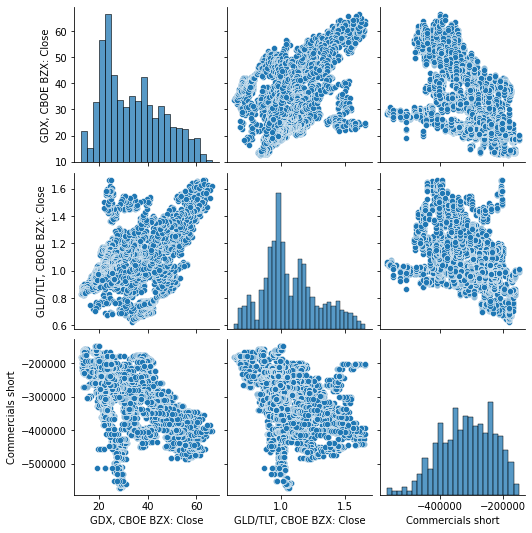

In [54]:
# Real interest rates not working
sns.pairplot(df[['GDX, CBOE BZX: Close','GLD/TLT, CBOE BZX: Close','Commercials short']][1484:])

# Begin Modelling

In [55]:
lm = LinearRegression()

In [72]:
y=df['GDX, CBOE BZX: Close'][1484:5600]

In [73]:
X=df[['GLD/TLT, CBOE BZX: Close','Commercials short']][1484:5600]

In [74]:
X.fillna(0)

,"GLD/TLT, CBOE BZX: Close",Commercials short
time,,
2006-06-05 22:00:00+00:00,0.735190,-180808
2006-06-06 22:00:00+00:00,0.731845,-180808
2006-06-07 22:00:00+00:00,0.714319,-180808
2006-06-08 22:00:00+00:00,0.705203,-180808
2006-06-11 22:00:00+00:00,0.699732,-180808
...,...,...
2022-09-21 22:00:00+00:00,1.479054,-217290
2022-09-22 22:00:00+00:00,1.447588,-217290
2022-09-25 22:00:00+00:00,1.458623,-217290


In [76]:
lm.fit(X['GLD/TLT, CBOE BZX: Close','Commercials short'],y)

KeyError: ('GLD/TLT, CBOE BZX: Close', 'Commercials short')

In [17]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [27.59686414]


In [18]:
predictions = lm.predict( X)


Text(0, 0.5, 'Predicted Y')

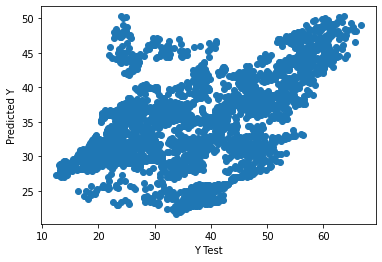

In [20]:
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [21]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 9.66281091824072
MSE: 117.17189555943042
RMSE: 10.824596785073817


c:\Users\James Stanley\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


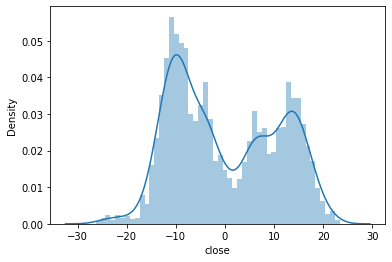

In [22]:
sns.distplot((y-predictions),bins=50);

In [23]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
"GLD/TLT, CBOE BZX: Close",27.596864


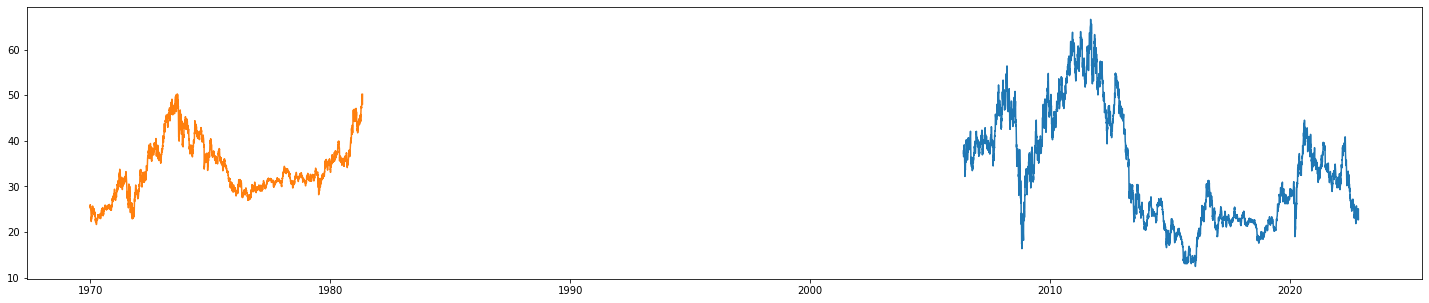

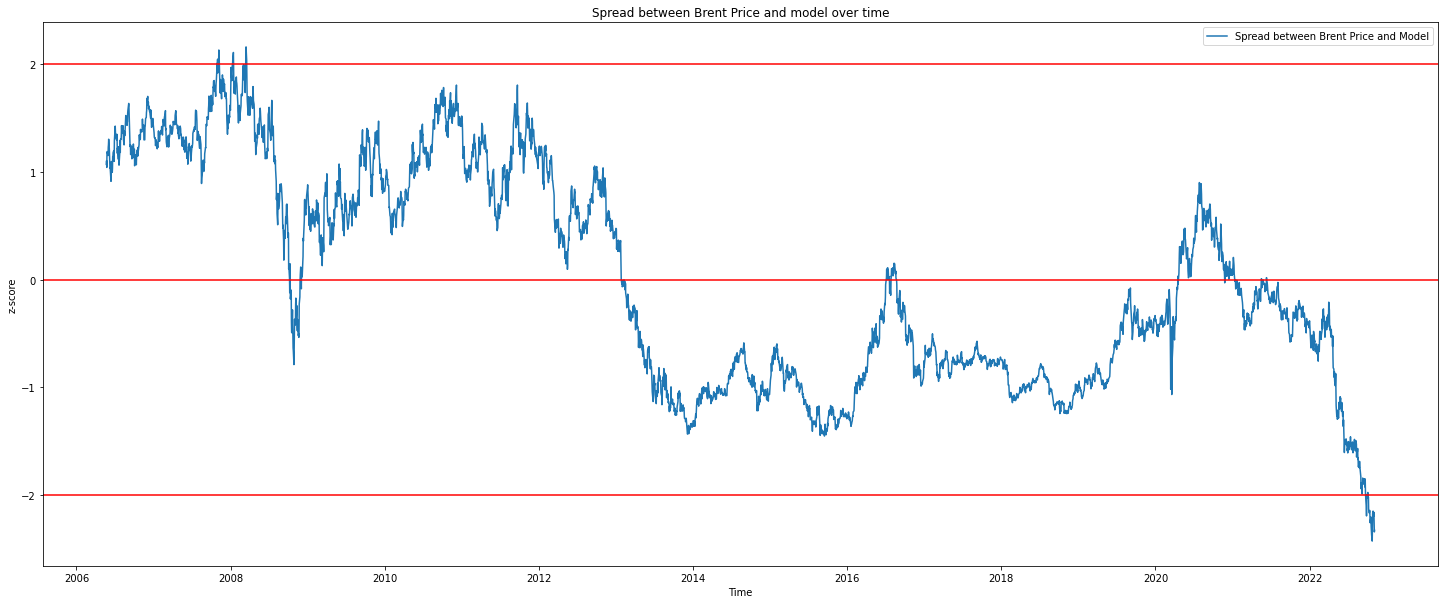

<AxesSubplot:xlabel='close', ylabel='Count'>

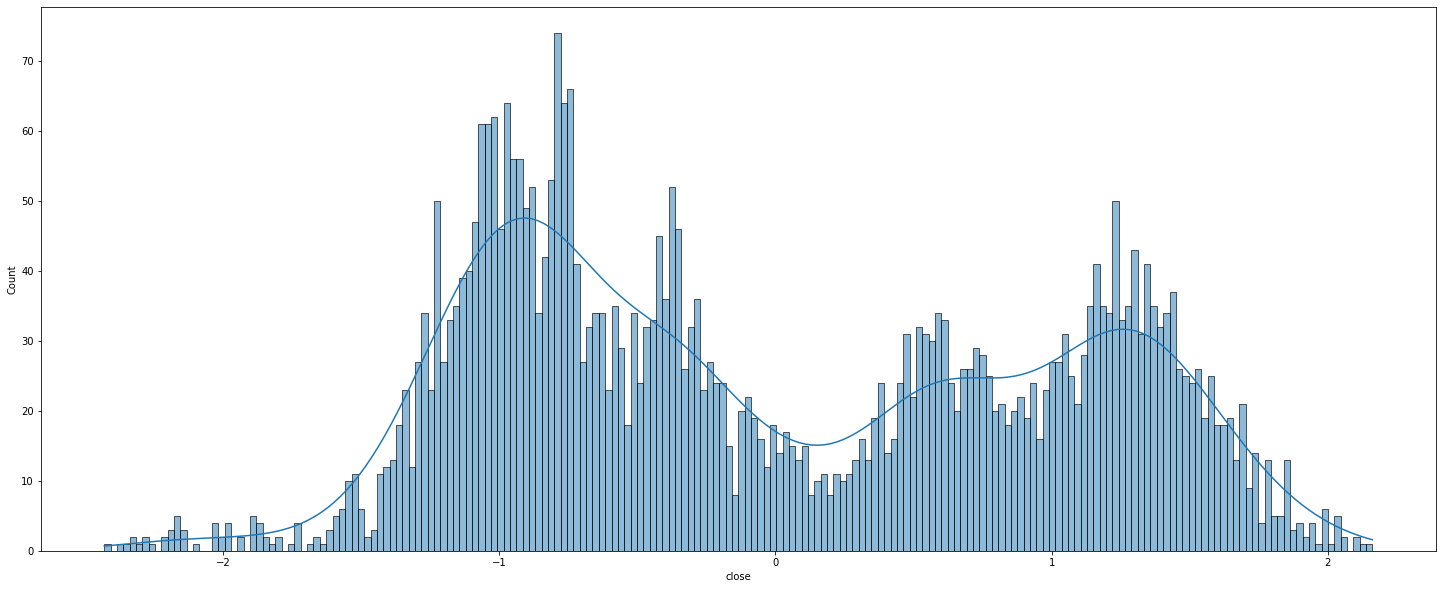

In [25]:
plt.figure(figsize=(25, 5))

plt.plot(df['close'])
plt.plot(predictions)

plt.figure(figsize=(25, 10))

plt.plot(stats.zscore(y-predictions))
plt.axhline(y=0,color='red')
plt.axhline(y=2,color='red')
plt.axhline(y=-2,color='red')

plt.legend(['Spread between Brent Price and Model'])
plt.ylabel("z-score")
plt.xlabel("Time")
plt.title("Spread between Brent Price and model over time")

plt.show()

plt.figure(figsize=(25, 10))

sns.histplot(stats.zscore(y-predictions),bins=200,kde=True)


In [39]:
model = sm.OLS(y, X)
GDX_model = model.fit()

print(GDX_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    GDX   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          8.777e+04
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:37:47   Log-Likelihood:                         -4199.9
No. Observations:                1632   AIC:                                      8408.
Df Residuals:                    1628   BIC:                                      8429.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

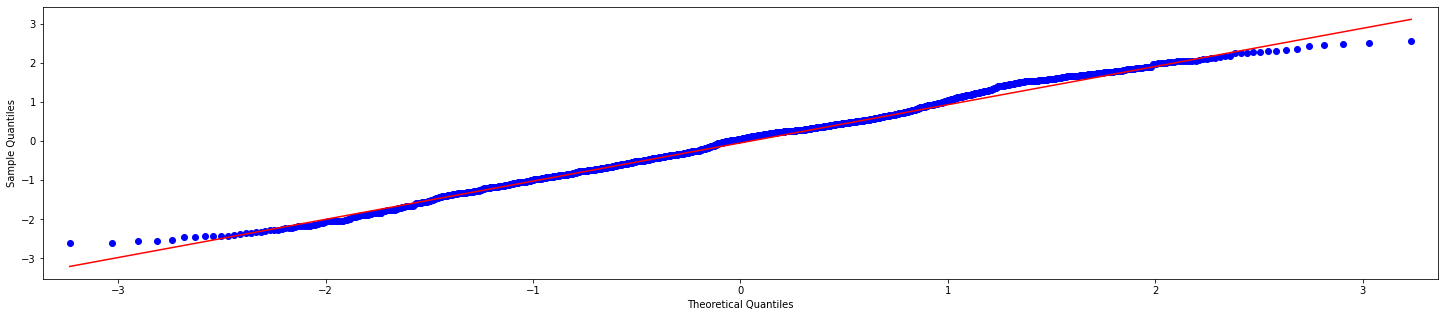

In [43]:
resid = GDX_model.resid

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

fig = sm.qqplot(resid, line='q', ax=ax, fit=True)

In [48]:
test = sms.omni_normtest(GDX_model.resid)

print("Chi^2",test[0])
print("p-value: ",test[1])

Chi^2 9.063356244223073
p-value:  0.010762599953058175


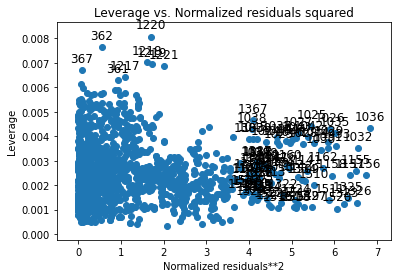

In [63]:

fig = figsize=(25, 25)
fig = plot_leverage_resid2(GDX_model)